# 西安酒店聚类分析

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans #导入K均值聚类算法
import pylab as mpl  #导入中文字体，避免显示乱码
mpl.rcParams['font.sans-serif']=['SimHei']  #设置为黑体字

poi_gpd=pd.read_pickle('../data/poiAll_gpd.pkl') #读取已经存储为.pkl格式的POI数据，其中包括geometry字段，为GeoDataFrame地理信息数据，可以通过poi_gpd.plot()迅速查看数据。

df = poi_gpd.reset_index()
df = df[df.level_0 == 'poi_1_hotel']
df = df.dropna(subset = ['detail_info_price','detail_info_overall_rating'],axis =0) #删除缺省值
df.head()

,level_0,level_1,name,location_lat,location_lng,detail_info_tag,detail_info_overall_rating,detail_info_price,geometry
11579,poi_1_hotel,1191,志诚丽柏酒店,34.240030,108.912124,酒店;星级酒店,4.6,376,POINT (108.91212 34.24003)
11580,poi_1_hotel,1194,水晶岛酒店,34.213837,108.893900,酒店;其他,4.4,299,POINT (108.89390 34.21384)
11581,poi_1_hotel,1195,西安高新希尔顿酒店,34.226686,108.894191,酒店;星级酒店,4.6,614,POINT (108.89419 34.22669)
11582,poi_1_hotel,1196,西安海升酒店,34.218452,108.891532,酒店;其他,4.6,264,POINT (108.89153 34.21845)
11583,poi_1_hotel,1197,西安天骊君廷大酒店,34.224739,108.919048,酒店;快捷酒店,4.8,655,POINT (108.91905 34.22474)


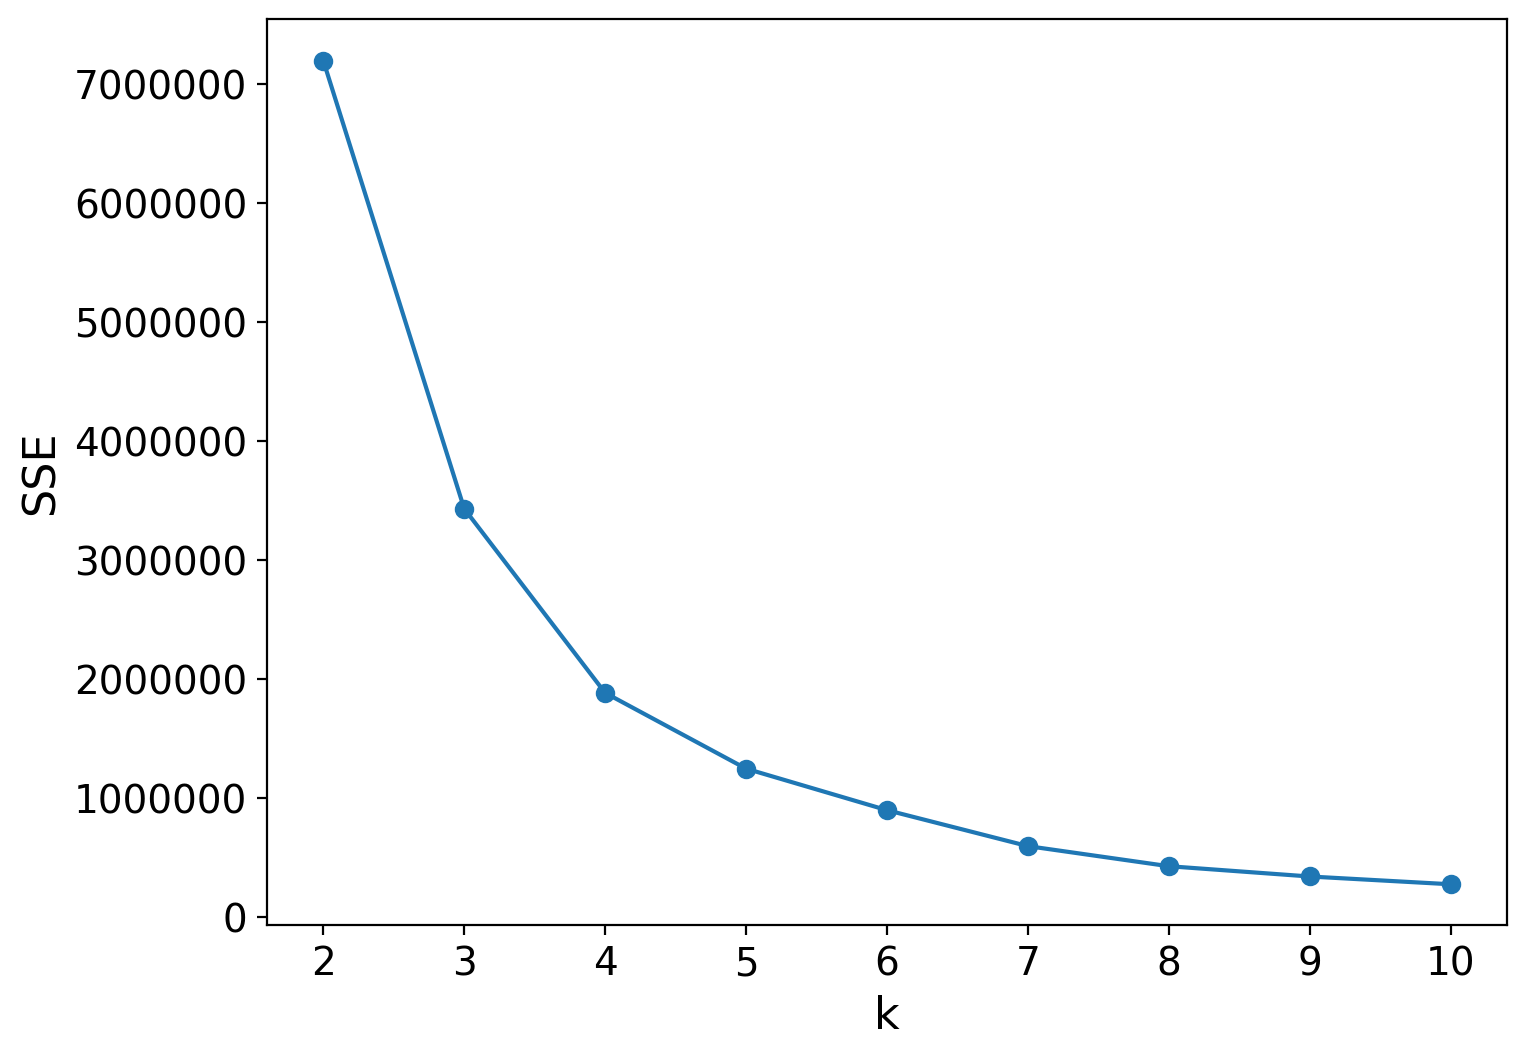

In [2]:
#手肘法看k值
d=[]
for i in range(2,11):    #k取值1~10，做kmeans聚类，看不同k值对应的簇内误差平方和
    km=KMeans(n_clusters=i)
    km.fit(df[['detail_info_price','detail_info_overall_rating']])
    d.append(km.inertia_)  #inertia簇内误差平方和

#生成figure对象
plt.figure(figsize = (8,6), dpi = 200)
plt.plot(range(2,11),d,marker='o')
plt.xlabel('k',fontsize = 16)
plt.ylabel('SSE',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [3]:
# K-means聚类
k = 6
km=KMeans(n_clusters=k)
km.fit(df[['detail_info_price','detail_info_overall_rating']])
df['k_clusters'] = km.labels_
df.head()

,level_0,level_1,name,location_lat,location_lng,detail_info_tag,detail_info_overall_rating,detail_info_price,geometry,k_clusters
11579,poi_1_hotel,1191,志诚丽柏酒店,34.240030,108.912124,酒店;星级酒店,4.6,376,POINT (108.91212 34.24003),1
11580,poi_1_hotel,1194,水晶岛酒店,34.213837,108.893900,酒店;其他,4.4,299,POINT (108.89390 34.21384),1
11581,poi_1_hotel,1195,西安高新希尔顿酒店,34.226686,108.894191,酒店;星级酒店,4.6,614,POINT (108.89419 34.22669),5
11582,poi_1_hotel,1196,西安海升酒店,34.218452,108.891532,酒店;其他,4.6,264,POINT (108.89153 34.21845),4
11583,poi_1_hotel,1197,西安天骊君廷大酒店,34.224739,108.919048,酒店;快捷酒店,4.8,655,POINT (108.91905 34.22474),5


In [10]:
price = []
rating = []
for i in range(0,k):
    price_mean = df[df.k_clusters == i]['detail_info_price'].mean()
    rating_mean = df[df.k_clusters == i]['detail_info_overall_rating'].mean()
    price.append(price_mean)
    rating.append(rating_mean)
    print('第{}类：平均价格为 {},  平均评分为 {}'.format(i,round(price_mean,2),round(rating_mean,2)))

第0类：平均价格为 128.04,  平均评分为 3.99
第1类：平均价格为 325.52,  平均评分为 4.52
第2类：平均价格为 949.57,  平均评分为 4.67
第3类：平均价格为 61.52,  平均评分为 3.88
第4类：平均价格为 210.91,  平均评分为 4.36
第5类：平均价格为 558.08,  平均评分为 4.58


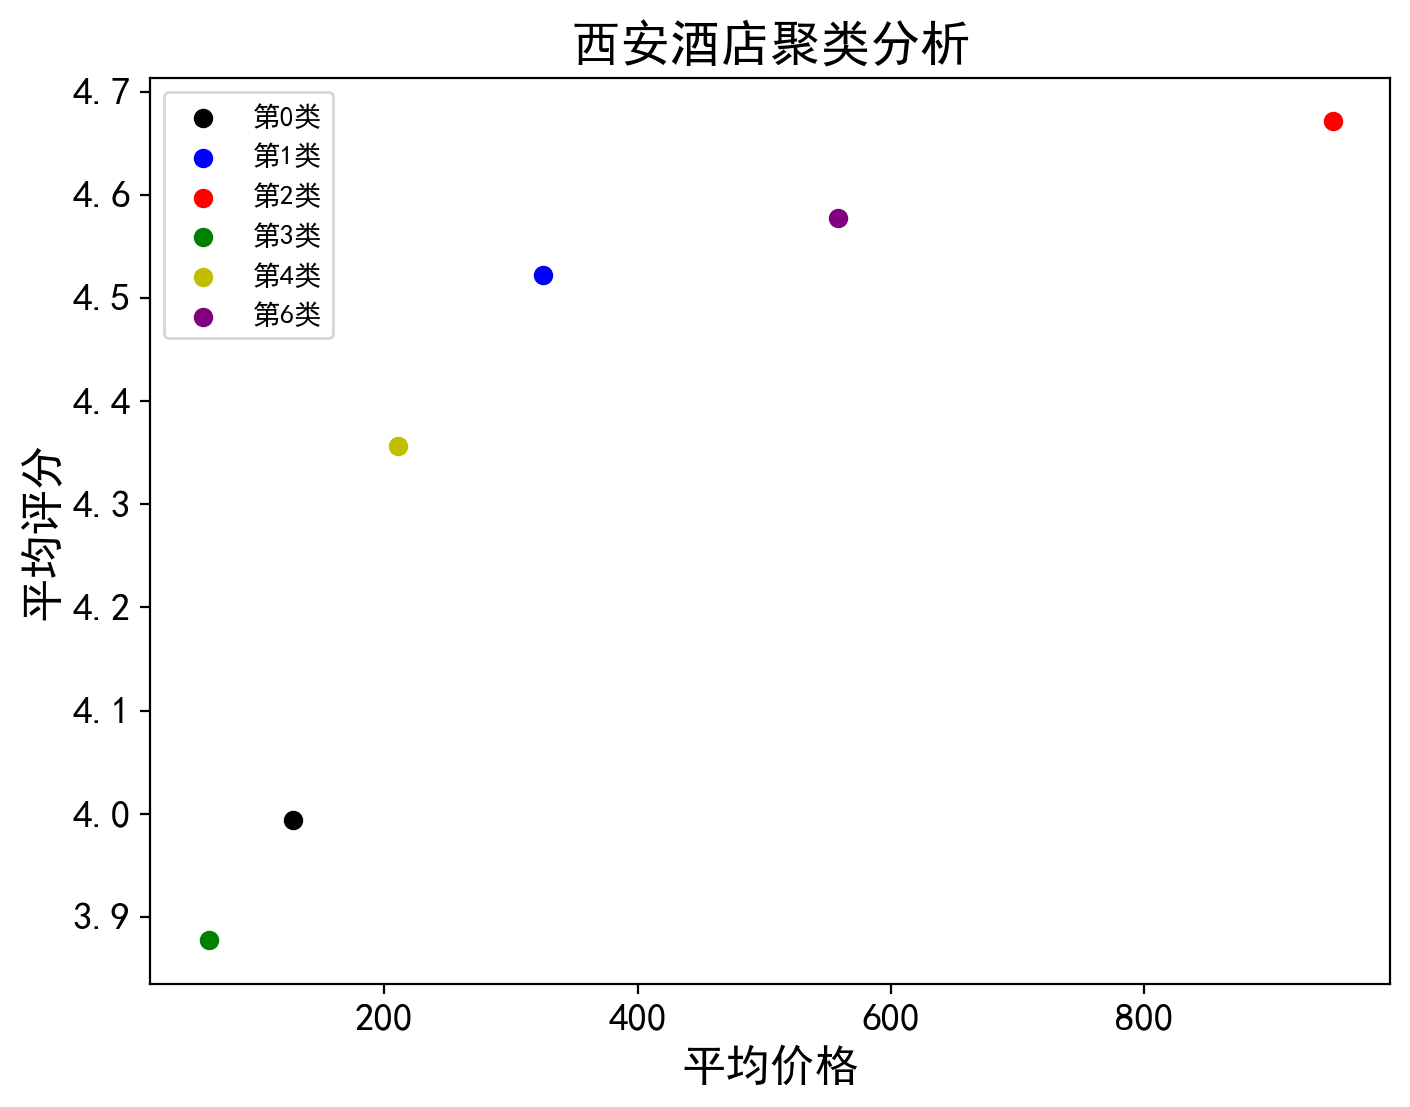

In [21]:
#生成figure对象
labels = ['第0类','第1类','第2类','第3类','第4类','第6类']
colors = ['black','blue','red','green','y','purple']
plt.figure(figsize = (8,6), dpi = 200)
for i in range(0,k):
    plt.scatter(price[i], rating[i], marker='o',c=colors[i],label = labels[i])
plt.xlabel('平均价格',fontsize = 16)
plt.ylabel('平均评分',fontsize = 16)
plt.title('西安酒店聚类分析',fontsize = 18)
plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()